In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

from classification_tools.experiments import *
from classification_tools.plotting import *
from AQSM_SW1PerS.utils.paths import get_data_path

%matplotlib inline

2025-08-29 20:57:31.818620: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Running Experiments

Below we use the `ClassificationExperiments` class in `classification_tools/experiments` to run and evaluate the different classification experiments presented in the paper. The class provides a unified interface for:

- Loading preprocessed feature sets from `scores_dir`(the different directories are located in the Dataset directory)  
- Splitting data according to the chosen experimental design (e.g., Stratified, LOCO, LOSO)  
- Optionally applying feature selection and hyperparameter optimization using Bayesian optimization
- Training and evaluating a Random Forest classifier


The parameters one must choose for `ClassificationExperiments` are as follows:

- `scores_dir` (str): directory where the `.csv` files for a given experiment are located.
- `experiment` (str): experimental design (Default = 'stratified'). May also choose 'LOSO' (Leave-one-Session-Out) or 'LOCO' (Leave-one-Individual-Out), must manually add more if desired. When set to 'stratified', it will return 
- `input_modality` (str): either 'accelerometer' or 'pose' (Default = 'pose').
- `method` (str): topologically-derived periodicity score method, either 'PS1' or 'PS10' (Default = 'PS1').
- `binary` (bool): perform binary if set True, multiclass if set to False Default = True).
- `include_freq` (bool): Should only be toggled True for accelerometer data unless high frame-rate videos are used. Supplemental feature to boost classification accuracy for accelerometer data (Default = False).
- `optimize` (bool): If True, then will find near-optimal hyperparameters using Bayesian optimization (Default = False).
- `load_params` (dict): Optionally load pre-optimized hyperparameters presented above (Default = None). Will be used if optimize = False.
- `optimize_feature_space` (bool): Along with hyperparameters, also optimize the selection of features (e.g. sensors or landmarks) used (Default = False).
- `random_state` (int): For reproducibility (Default= 42).


All visualization tools are located in `classification_tools/plotting`

## Example: Stratified Classification of Accelerometer data

In [2]:
#Change as desired for use

scores_dir = get_data_path('experiments/experiment_1/accelerometer_exp1')
experiment = 'stratified'
input_modality = 'accelerometer'
method = 'PS1'
binary = True
include_freq = False
optimize = True
params = False
optimize_feature_space = False

In [3]:
#Example: Stratified classification (Experiment 1) using above parameters and scores_dir

ClassExp = ClassificationExperiments(scores_dir, 
                                     experiment = experiment, 
                                     input_modality = input_modality, 
                                     method = method, 
                                     binary = binary,
                                     include_freq = include_freq,
                                     optimize = optimize,
                                     load_params = params,
                                     optimize_feature_space = optimize_feature_space,
                                     )


ClassExp.run_classification_experiment()

              precision    recall  f1-score   support

        None       0.86      0.91      0.88       511
         SMM       0.87      0.81      0.84       407

    accuracy                           0.86       918
   macro avg       0.87      0.86      0.86       918
weighted avg       0.86      0.86      0.86       918



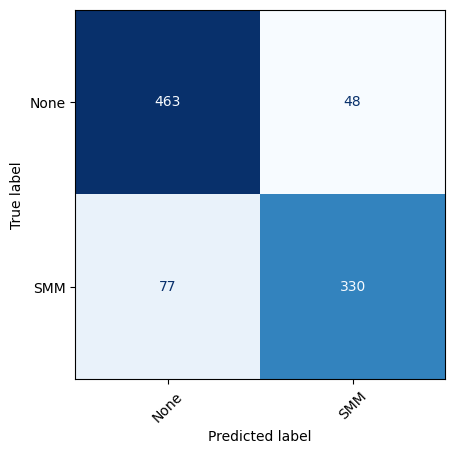

In [4]:
# View Model's decisions with confusion matrix
cm = confusion_matrix(ClassExp.y_test, ClassExp.test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ClassExp.class_names)
disp.plot(cmap="Blues", xticks_rotation=45, colorbar=False)

## Example: LOSO Classification of Pose data

In [ ]:
#Change as desired for use

scores_dir = get_data_path('experiments/experiment_234/pose_exp234')
experiment = 'LOSO'
input_modality = 'pose'
method = 'PS10'
binary = True
include_freq = False
optimize = True
params = False
optimize_feature_space = True

In [ ]:
#Example: Stratified classification (Experiment 1) using above parameters and scores_dir

ClassExp = ClassificationExperiments(scores_dir, 
                                     experiment = experiment, 
                                     input_modality = input_modality, 
                                     method = method, 
                                     binary = binary,
                                     include_freq = include_freq,
                                     optimize = optimize,
                                     load_params = params,
                                     optimize_feature_space = optimize_feature_space,
                                     )


ClassExp.run_classification_experiment()

## Example: LOCO Classification of Accelerometer data

In [ ]:
#Change as desired for use
scores_dir = get_data_path('experiments/experiment_234/accelerometer_exp234')
experiment = 'LOSO'
input_modality = 'accelerometer'
method = 'PS1'
binary = True
include_freq = True
optimize = True
params = False
optimize_feature_space = False

In [ ]:
#Example: Stratified classification (Experiment 1) using above parameters and scores_dir

ClassExp = ClassificationExperiments(scores_dir, 
                                     experiment = experiment, 
                                     input_modality = input_modality, 
                                     method = method, 
                                     binary = binary,
                                     include_freq = include_freq,
                                     optimize = optimize,
                                     load_params = params,
                                     optimize_feature_space = optimize_feature_space,
                                     )


ClassExp.run_classification_experiment()

# Visualizations

Below is how we can use the class to recreate the visualizations presented in the paper. We call two initializations of `ClassificationExperiments` to compare $PS_1$ and $PS_{10}$ with the above parameters.

In [ ]:

scores_dir = get_data_path('experiments/experiment_1/pose_exp1')
experiment = 'stratified'
input_modality = 'pose'
binary = True
include_freq = False
optimize = True
optimize_feature_space = True
return_model = True


ClassExp_1 = ClassificationExperiments(scores_dir, 
                                     experiment = experiment, 
                                     input_modality = input_modality, 
                                     method = 'PS1', 
                                     binary = binary,
                                     include_freq = include_freq,
                                     optimize = optimize,
                                     load_params = None,
                                     optimize_feature_space = optimize_feature_space,
                                     return_model = return_model)


ClassExp_1.run_classification_experiment()

model_1 = ClassExp_1.model

ClassExp_10 = ClassificationExperiments(scores_dir, 
                                     experiment = experiment, 
                                     input_modality = input_modality, 
                                     method = 'PS10', 
                                     binary = binary,
                                     include_freq = include_freq,
                                     optimize = optimize,
                                     load_params = None,
                                     optimize_feature_space = optimize_feature_space,
                                     return_model = return_model)


ClassExp_10.run_classification_experiment()
model_10 = ClassExp_10.model


In [ ]:
plot1_title = fr'$PS_1$ Pose Binary'
plot2_title = r'$PS_{10}$ Pose Binary'

compare_confusion_matrices(ClassExp_1, ClassExp_10, plot1_title, plot2_title, save_fig = False)

In [ ]:
plot1_title = fr'Pose Precision-Recall Curve Binary ($PS_1$)'
plot2_title = r'Pose Precision-Recall Curve Binary ($PS_{10}$)'

compare_pr_curves(ClassExp_1, model_1, ClassExp_10, model_10, binary = binary, plot1_title, plot2_title, save_fig = False)

In [ ]:
plot1_title = fr'Pose $PS_1$ Binary - Feature Importances'
plot2_title = r'Pose $PS_{10}$ Binary - Feature Importances'

compare_feature_importances(ClassExp_1, model_1, ClassExp_10, model_10, plot1_title, plot2_title, save_fig = False)

# Visualizations - Feature Space

The following is used to create the UMAP visualizations presented in the paper

In [ ]:
#Change as desired for use

scores_dir = get_data_path('experiments/experiment_1/accelerometer_exp1')
input_modality = 'accelerometer'
method = 'PS1'
include_freq = False

Feature_extraction = ClassificationExperiments(scores_dir, input_modality = input_modality, method = method, include_freq = include_freq)
Feature_extraction.load_data()
X_features = Feature_extraction.features


In [ ]:
explained_variance_plots(X_features)

In [ ]:
df_umap = umap_reduction(X_features, Feature_extraction)

In [ ]:
plot_interactive(df_umap, color_by_anno = True, save_html=False)

In [ ]:
#Choose what UMAP components you wish to see
x_axis = 'UMAP1' 
y_axis = 'UMAP2'

plot_UMAP_comparison(df_umap, x_axis, y_axis, method, save_fig = False)